In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [5]:
path = './data/'
olist_customer = pd.read_csv(path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
olist_order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
olist_orders = pd.read_csv(path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')
olist_translation = pd.read_csv(path + 'product_category_name_translation.csv')

In [6]:
dfs = [olist_customer, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, olist_translation]
dfs_names = ['olist_customer','olist_geolocation', 'olist_order_items', 'olist_order_payments', 'olist_order_reviews', 'olist_orders', 'olist_products', 'olist_sellers', 'olist_translation']
j = 0
for i in dfs:
    print (dfs_names[j])
    j = j+1 
    print(i.shape)
    print(i.columns)
    print()

olist_customer
(99441, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

olist_geolocation
(1000163, 5)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

olist_order_items
(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

olist_order_payments
(103886, 5)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

olist_order_reviews
(99224, 7)
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

olist_orders
(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
  

In [7]:
olist_customer["customer_unique_id"].nunique()

96096

In [8]:
df= pd.merge(olist_customer, olist_orders, on="customer_id", how='inner')
df= df.merge(olist_order_reviews, on="order_id", how='inner')
df= df.merge(olist_order_items, on="order_id", how='inner')
df= df.merge(olist_products, on="product_id", how='inner')
df= df.merge(olist_order_payments, on="order_id", how='inner')
df= df.merge(olist_sellers, on='seller_id', how='inner')
df= df.merge(olist_translation, on='product_category_name', how='inner')
df.shape

(115609, 40)

In [9]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,15.0,40.0,1,credit_card,8,335.48,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,17.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,51.0,28.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [11]:
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    df[feature] = pd.to_datetime(df[feature], errors = 'raise', utc = False)

In [9]:
df.rename(columns = {'product_name_lenght':'product_name_length', 
                       'product_description_lenght':'product_description_length'}, inplace = True)

In [10]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                               

In [11]:
df.shape

(115609, 40)

In [12]:
Total = df.isnull().sum().sort_values(ascending = False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False) 

missing_data = pd.concat([Total, Percent], axis = 1)    
print(missing_data) 

                                    0          1
review_comment_title           101808  88.062348
review_comment_message          66703  57.697065
order_delivered_customer_date    2400   2.075963
order_delivered_carrier_date     1195   1.033657
order_approved_at                  14   0.012110
product_height_cm                   1   0.000865
product_weight_g                    1   0.000865
product_length_cm                   1   0.000865
product_width_cm                    1   0.000865
customer_id                         0   0.000000
product_name_length                 0   0.000000
product_description_length          0   0.000000
product_photos_qty                  0   0.000000
payment_sequential                  0   0.000000
freight_value                       0   0.000000
payment_type                        0   0.000000
payment_installments                0   0.000000
payment_value                       0   0.000000
seller_zip_code_prefix              0   0.000000
seller_city         

In [13]:
df.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [14]:
df.to_csv("./data/merged_data.csv")

Which cities are generating the highest orders?¶

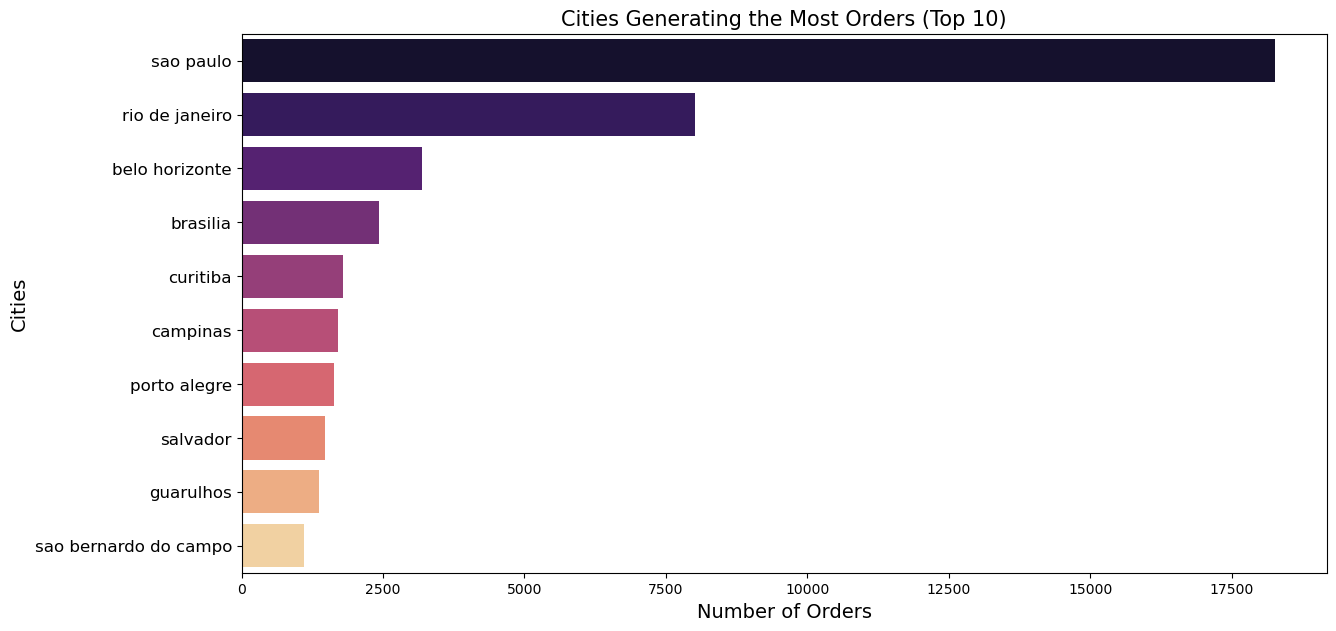

In [34]:
top_orders_cities = df.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False)
plt.figure(figsize = (14, 7))
sns.barplot(x = "order_id", y="customer_city", data = top_orders_cities[:10], palette = 'magma')
plt.xlabel("Number of Orders", fontsize = 14)
plt.ylabel("Cities", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title("Cities Generating the Most Orders (Top 10)", fontsize = 15)
plt.show()

Which cities are generating the most revenue?

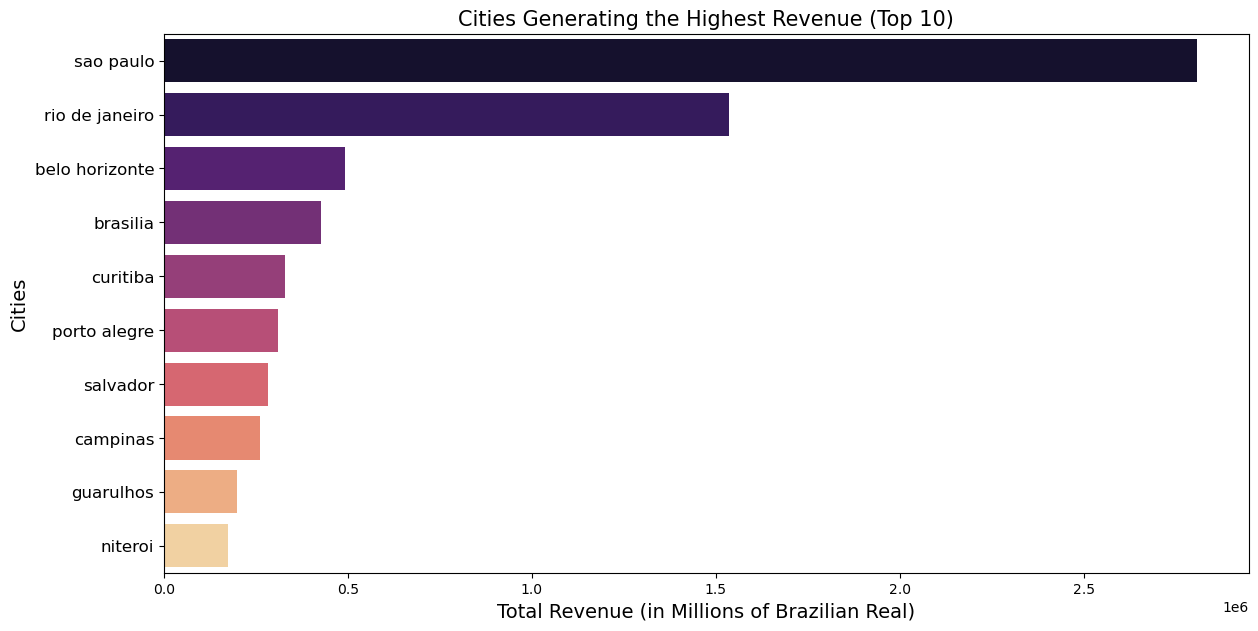

In [35]:
top_revenue_cities = df.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False)
plt.figure(figsize = (14, 7))
sns.barplot(x = "payment_value", y = "customer_city", data = top_revenue_cities[:10], palette = 'magma')
plt.xlabel("Total Revenue (in Millions of Brazilian Real)", fontsize = 14)
plt.ylabel("Cities", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title("Cities Generating the Highest Revenue (Top 10)", fontsize = 15)
plt.show()

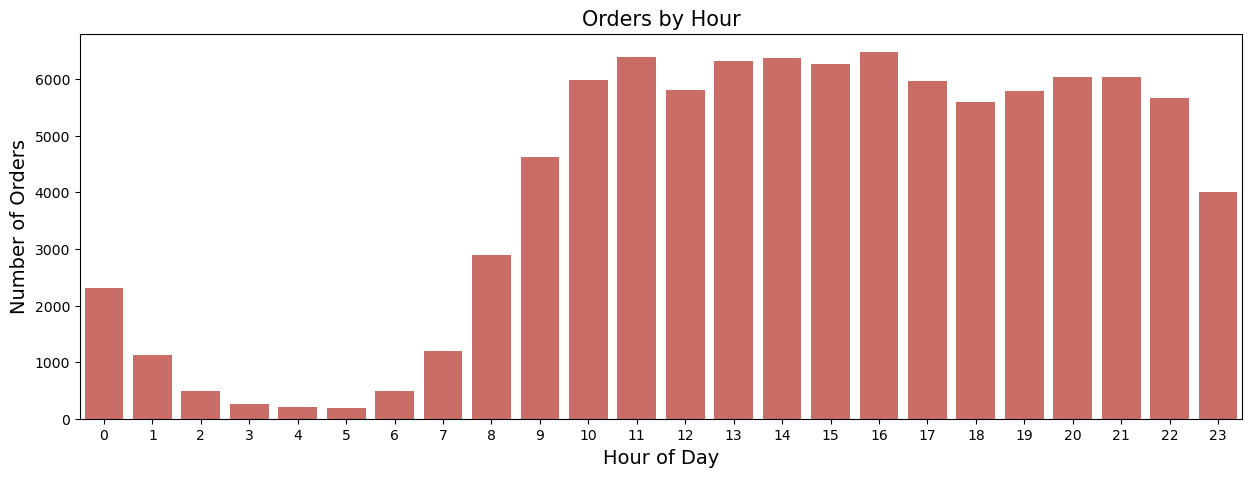

In [36]:
clrp = sns.color_palette("hls", 1)

orders_byHour = df.groupby(df.order_purchase_timestamp.dt.hour)['order_id'].nunique().reset_index()
plt.figure(figsize = (15, 5))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = orders_byHour, palette = clrp)
plt.xlabel("Hour of Day", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Hour", fontsize = 15)
plt.show()

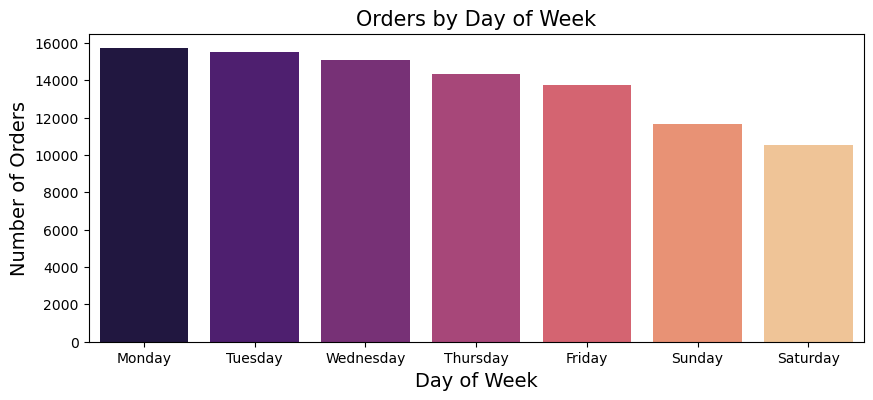

In [37]:
orders_byDays = df.groupby(df.order_purchase_timestamp.dt.day_name())['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
plt.figure(figsize = (10, 4))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = orders_byDays, palette = 'magma')
plt.xlabel("Day of Week", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Day of Week", fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Product Categories with the Highest Orders (Top 10)')

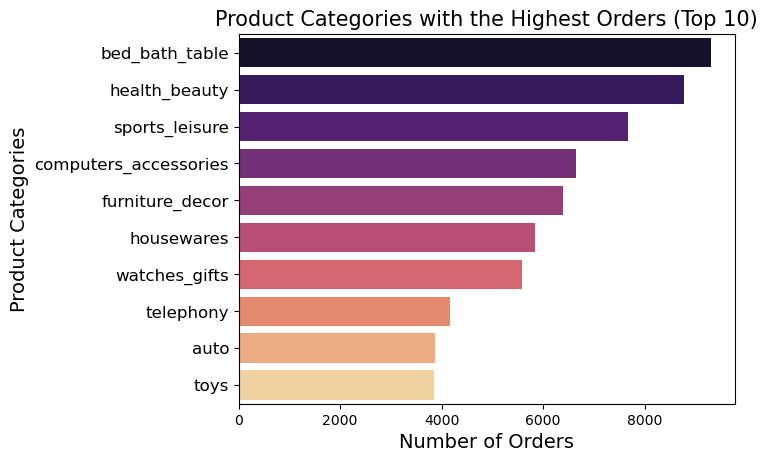

In [38]:
prodCat_TopOrders = df.groupby(df['product_category_name_english'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
sns.barplot(x = 'order_id', y = 'product_category_name_english', data = prodCat_TopOrders[:10], palette = 'magma')
plt.xlabel("Number of Orders", fontsize = 14)
plt.ylabel("Product Categories", fontsize = 14)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title("Product Categories with the Highest Orders (Top 10)", fontsize = 15)

Text(0.5, 1.0, 'Product Categories with the Lowest Orders')

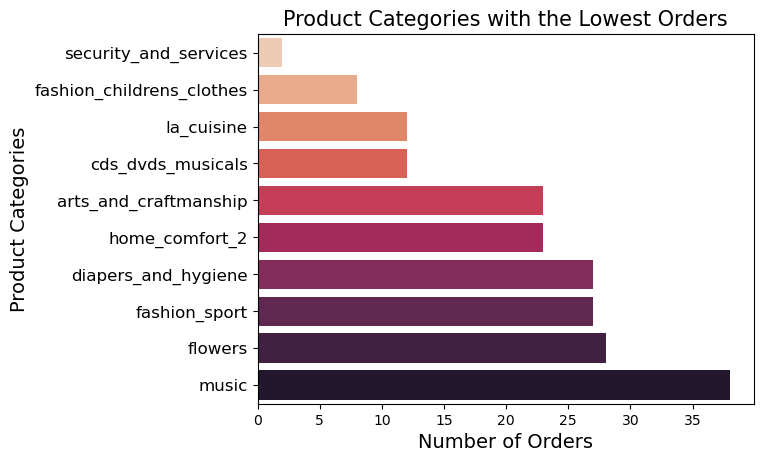

In [39]:
prodCat_TopOrders = df.groupby(df['product_category_name_english'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = True)
sns.barplot(x = 'order_id', y = 'product_category_name_english', data = prodCat_TopOrders[:10], palette = 'rocket_r')
plt.xlabel("Number of Orders", fontsize = 14)
plt.ylabel("Product Categories", fontsize = 14)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title("Product Categories with the Lowest Orders", fontsize = 15)

In [40]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [41]:
df.to_csv("./data/merged_data.csv")

In [42]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'product_category'],
      dtype='object')

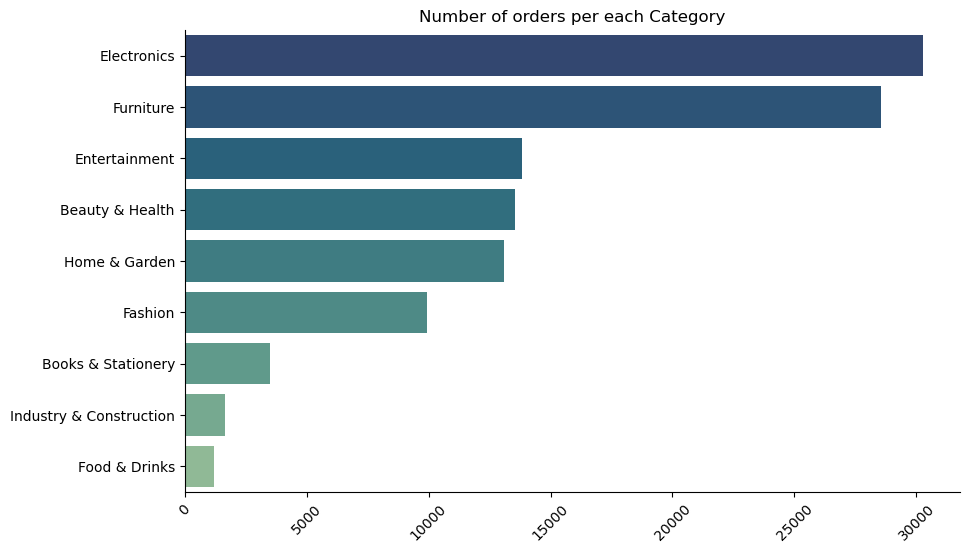

In [74]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

In [ ]:
# Grouping data
df_orders_pay = df_orders_filt.merge(olist_order_payments, how='left', on='order_id')

# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']
label_names = df_orders_pay['payment_type'].value_counts().index
donut_plot(df_orders_pay, col='payment_type', ax=ax1, label_names=label_names, colors=colors,
           title='Count of Transactions by Payment Type', text=f'{len(df_orders_pay)}\npayments \nregistered')

# Plot 2 - Payment installments
single_countplot(df_orders_pay, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
plt.show()

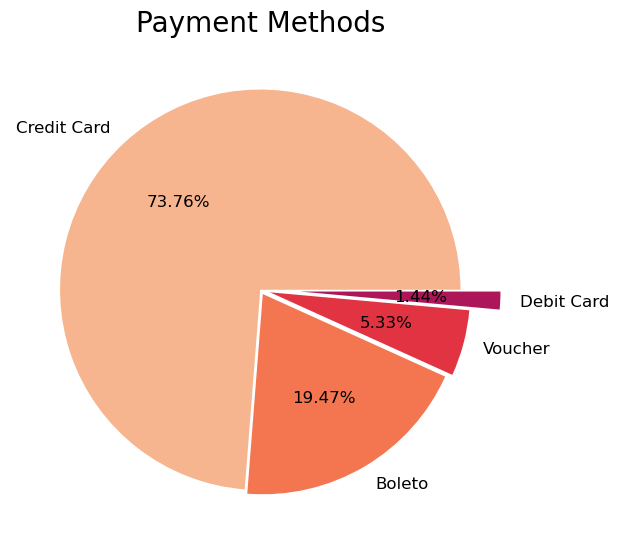

In [75]:
plt.figure(figsize = (10, 6.5))
payment_type_counts = df.payment_type.value_counts()
plt.pie(x = payment_type_counts.to_list(), labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card'], 
        autopct = '%1.2f%%', explode = (0, 0.025, 0.05, 0.2), colors = sns.color_palette('rocket_r'), 
        textprops = {'fontsize': 12})
plt.title("Payment Methods", fontsize = 20)
plt.show()

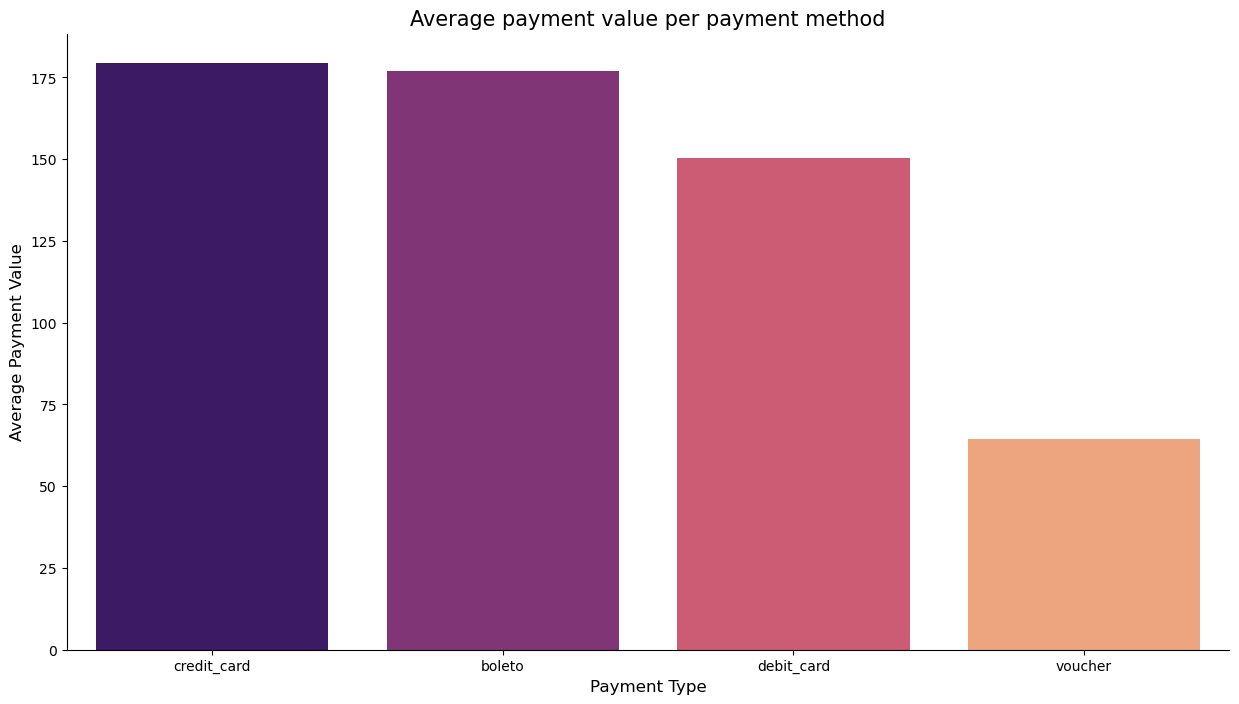

In [87]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'magma')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

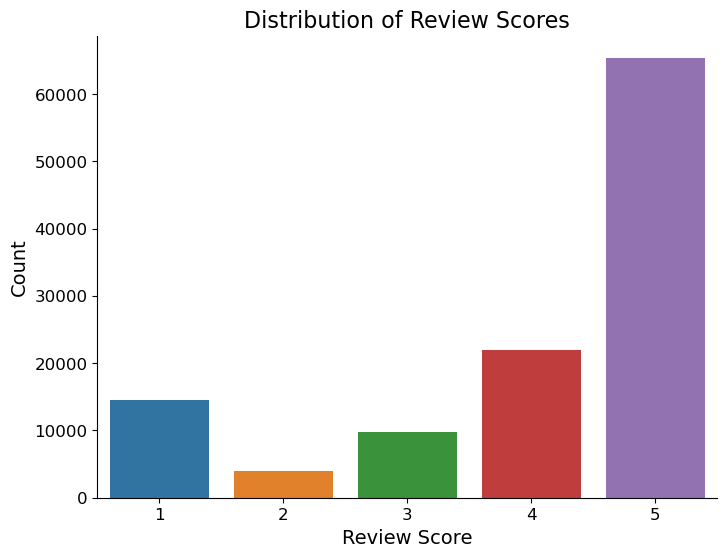

In [77]:
# Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=df)
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

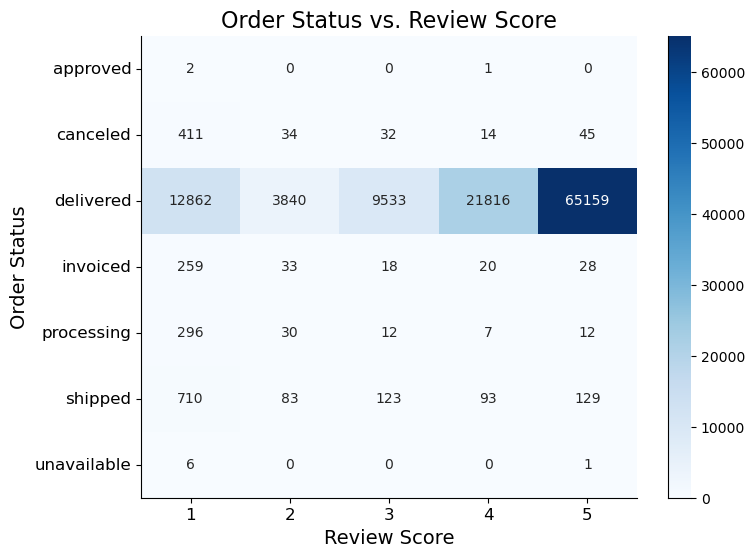

In [78]:
# Contingency table of order status vs. review score
cont_table = pd.crosstab(df['order_status'], df['review_score'])
plt.figure(figsize=(8, 6))
sns.heatmap(cont_table, cmap='Blues', annot=True, fmt='d')
plt.title('Order Status vs. Review Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Order Status', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

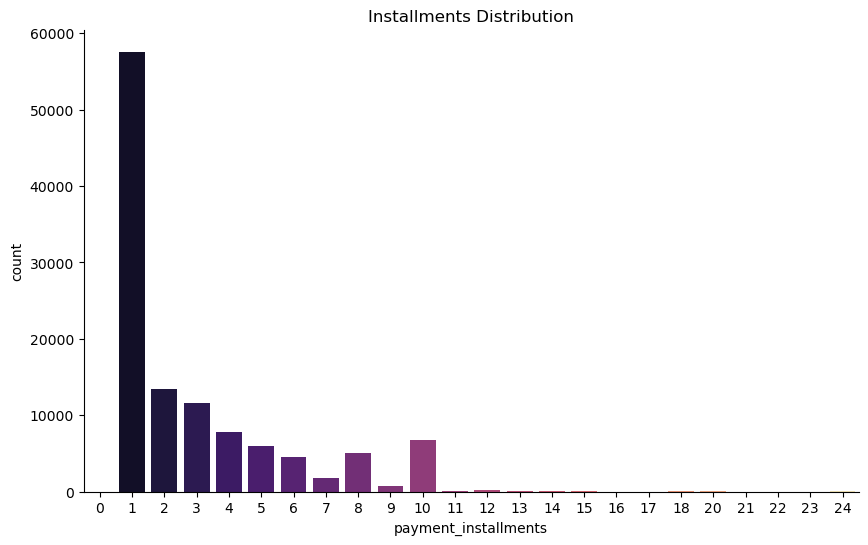

In [79]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.payment_installments, palette= 'magma')
plt.title('Installments Distribution')
sns.despine()

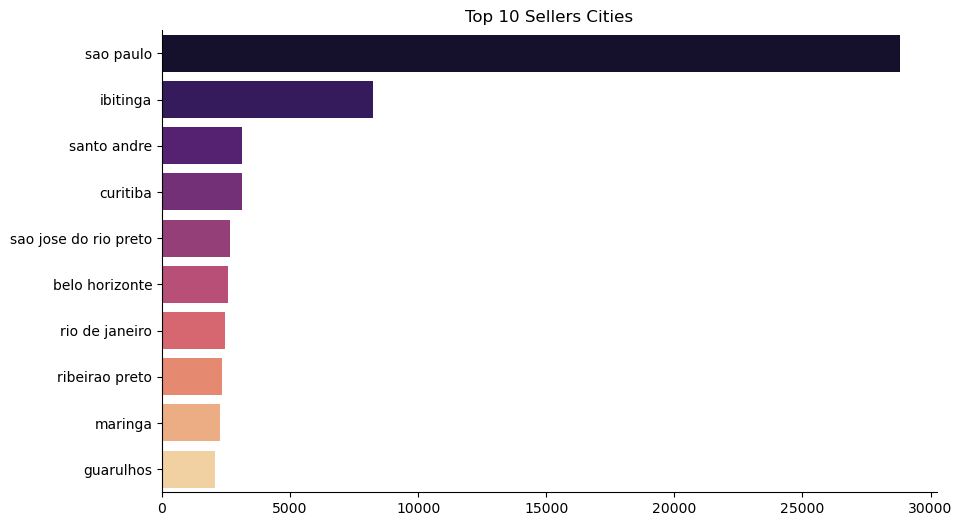

In [80]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'magma')
plt.title('Top 10 Sellers Cities')
sns.despine()

How long does it take for the products to be delivered?

In [81]:
deliveryTime = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"])
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())
df['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

In [82]:
df['deliveryTime_Days'].describe()

count    113209.000000
mean         12.442129
std           9.356006
min           0.530000
25%           6.740000
50%          10.190000
75%          15.500000
max         208.350000
Name: deliveryTime_Days, dtype: float64

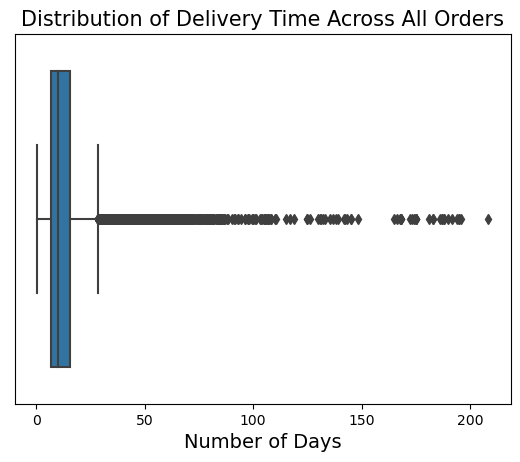

In [83]:
sns.boxplot(df.deliveryTime_Days, orient = 'h', showfliers = True)
plt.xlabel("Number of Days", fontsize = 14)
plt.yticks([])
plt.title('Distribution of Delivery Time Across All Orders', fontsize = 15)
plt.show()

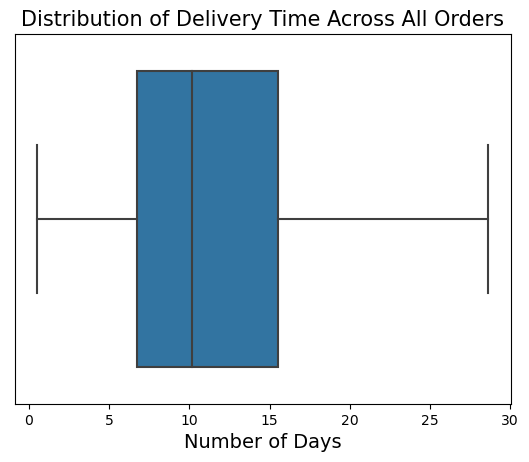

In [84]:
sns.boxplot(df.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel("Number of Days", fontsize = 14)
plt.yticks([])
plt.title('Distribution of Delivery Time Across All Orders', fontsize = 15)
plt.show()

Text(0, 0.5, 'Product Category')

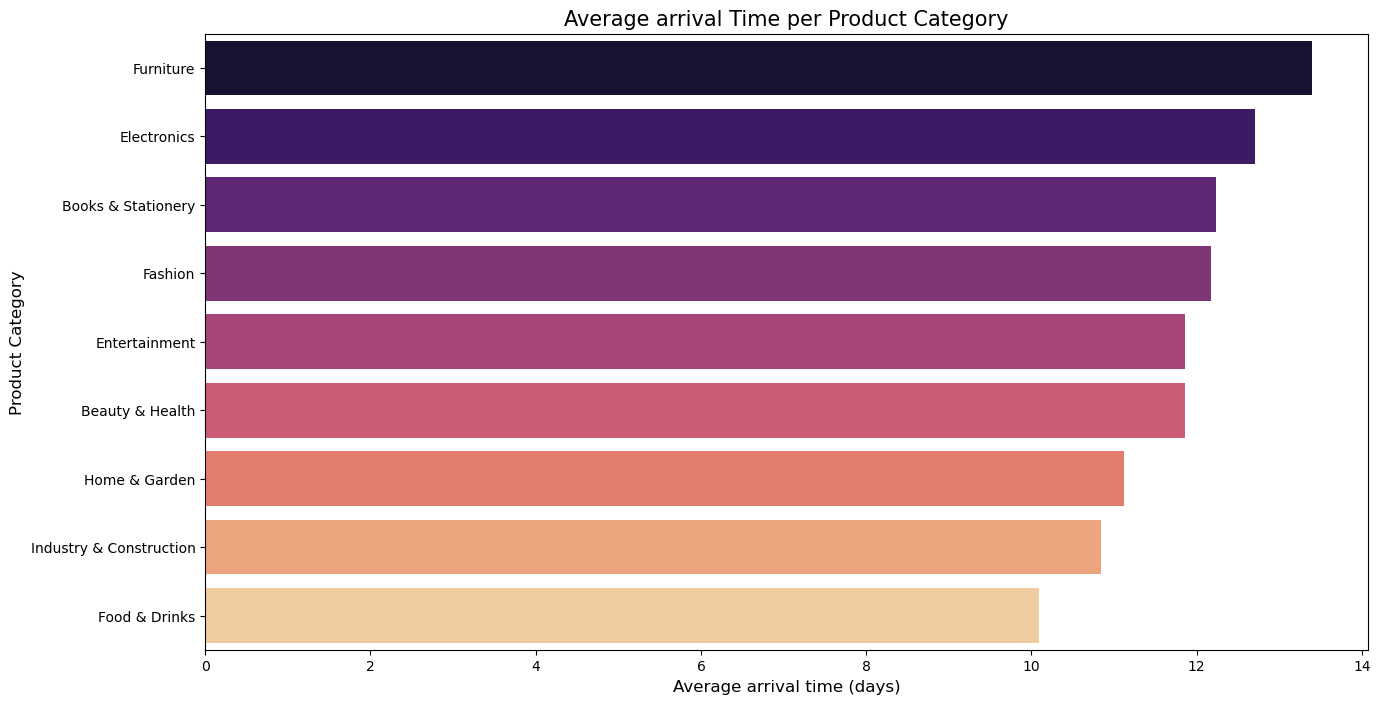

In [86]:
df['arrival_days'] = (df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days

# Group product category by average arrival time
ship_per_cat = df.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'magma')

plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)


Do longer delivery times lead to poor review scores?

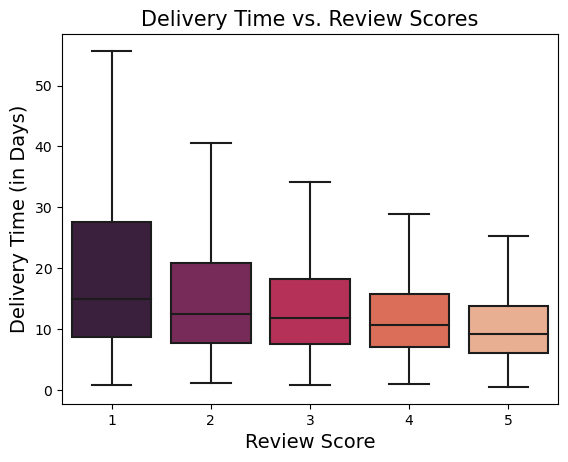

In [33]:
sns.boxplot(x = "review_score", y = "deliveryTime_Days", data = df, showfliers = False, palette = 'rocket')
plt.xlabel("Review Score", fontsize = 14)
plt.ylabel("Delivery Time (in Days)", fontsize = 14)
plt.title("Delivery Time vs. Review Scores", fontsize = 15)
plt.show()

In [34]:
df['seller_to_carrier_status'] = (df['shipping_limit_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

In [35]:
# First get difference between estimated delivery date and actual delivery date in days
df['arrival_status'] = (df['order_estimated_delivery_date'].dt.date - df['order_delivered_customer_date'].dt.date).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

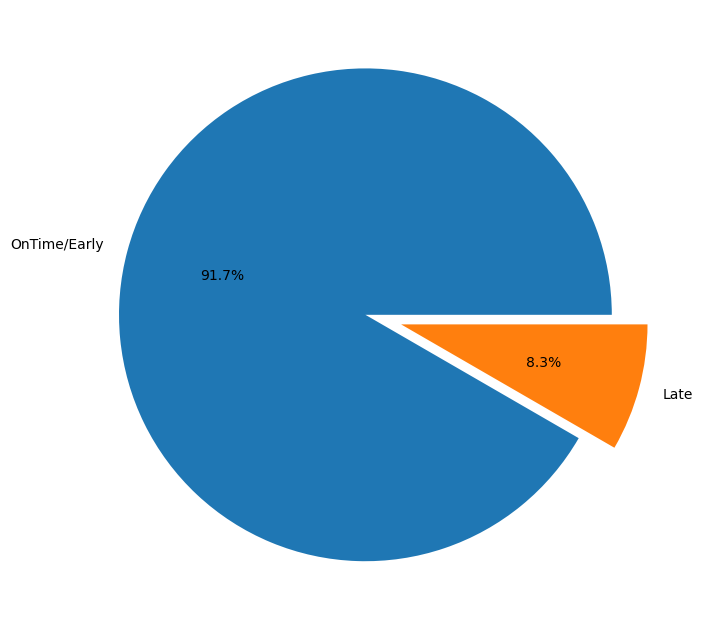

In [36]:
plt.figure(figsize=[30,8])
Values = df.arrival_status.value_counts().values
Labels = df.arrival_status.value_counts().index
plt.pie(Values, explode=(0.05, 0.1), labels= ['OnTime/Early', 'Late'], autopct='%1.1f%%')
plt.show()

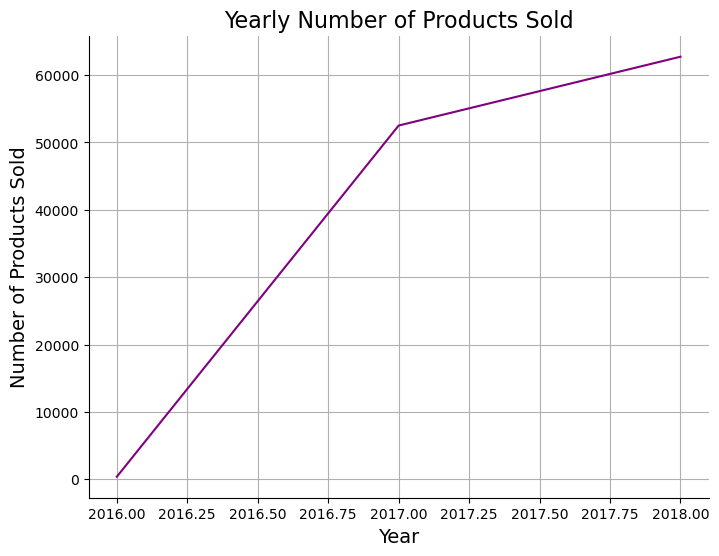

In [38]:
df['order_year'] = df['order_purchase_timestamp'].dt.year

# Group by year and count the number of products sold in each year
yearly_products_sold = df.groupby('order_year')['order_item_id'].count()

plt.figure(figsize=(8, 6))
plt.plot(yearly_products_sold.index, yearly_products_sold.values, color='purple')

plt.title('Yearly Number of Products Sold', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)

sns.despine()
plt.grid(True)

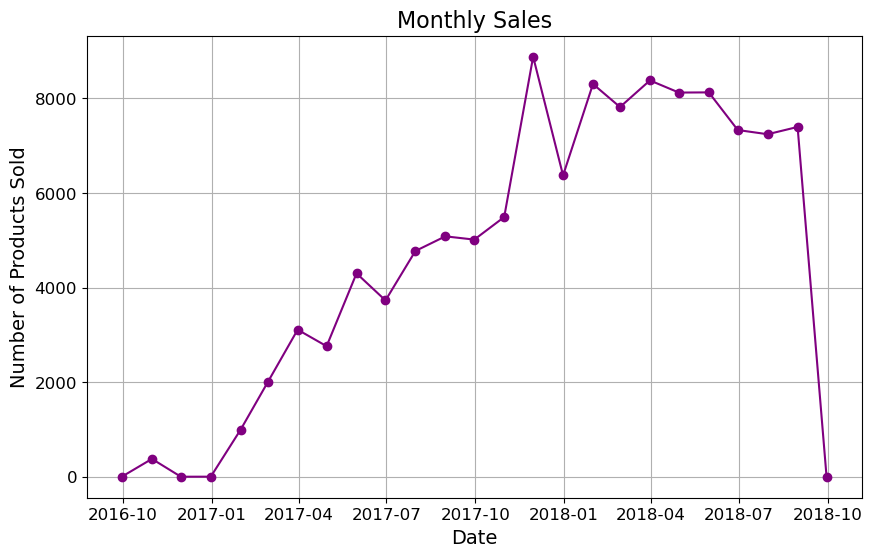

In [39]:
monthly_sales = df.resample('M', on='order_purchase_timestamp')['order_item_id'].count()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, '-o', color='purple')

plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)

plt.grid(True)

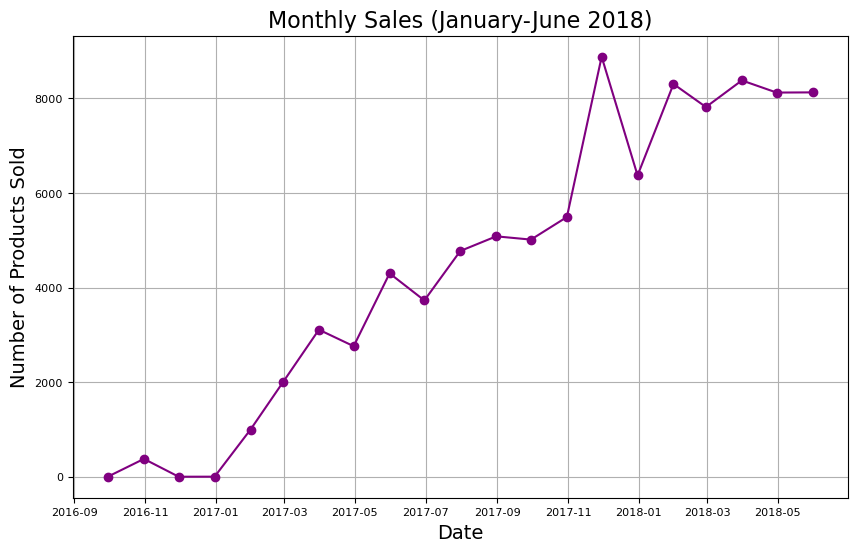

In [40]:
monthly_sales = df.resample('M', on='order_purchase_timestamp')['order_item_id'].count()

monthly_sales = monthly_sales['2016-01':'2018-05']


plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, '-o', color='purple')

plt.title('Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)

plt.grid(True)

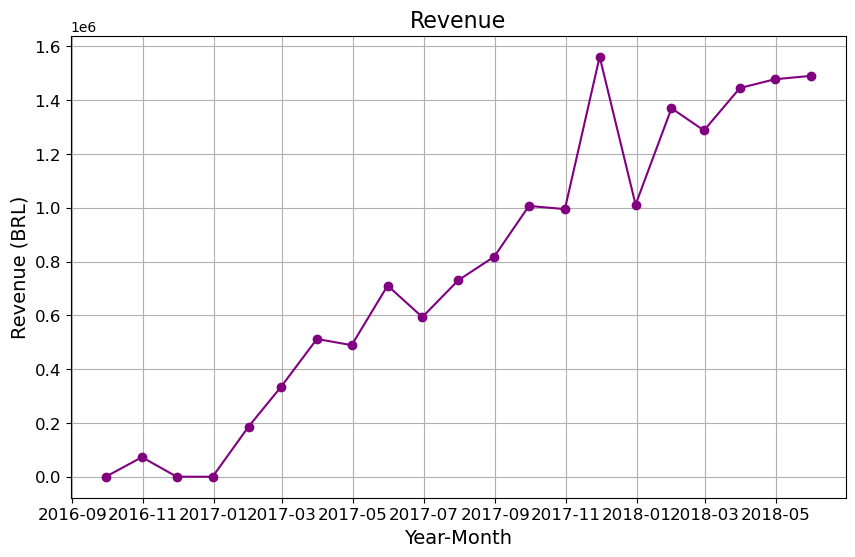

In [50]:
monthly_revenue = df['payment_value'].resample('M').sum()

monthly_revenue = monthly_revenue['2016-01':'2018-05']


plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, '-o', color='purple')

plt.title('Revenue', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Revenue (BRL)', fontsize=14)

plt.grid(True)
plt.show()